**PREDIKSI DIABETES MENGGUNAKAN K-Nearest Neighbors(KNN)**

Tujuan Yang Akan Dicapai :


*   Membangun model KNN untuk memprediksi diabetes
*   Mengevaluasi performa model dengan matrix akurasi, precision, recall, dan F1 Score
*   Menyajikan visualisasi confusion matrix untuk memahami kinerja model lebih baik.






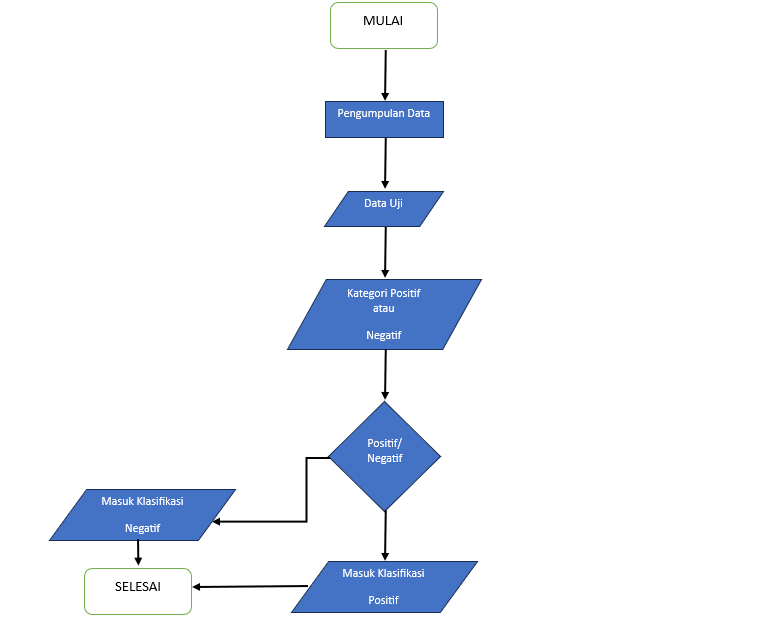

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

**Data Set**:
Dataset yang saya gunakan adalah dataset Diabetes dari Kaggle yang berisi data medis dari pasien dengan beberapa fitur dan satu label yang menunjukan apakah pasien :
Menderita Diabetes (1) Jika tidak (0).

Fitur dalam dataset meliput :

*   Pregnancies              : Jumlah kehamilan.
*   Glucose                  : Konsentrasi glukosa plasma dua jam dalam tes toleransi glukosa oral.
*   BloodPressure            : Tekanan darah diastolik (mm Hg).
*   SkinThickness            : Ketebalan lipatan kulit triceps.
*   Insulin                  : Serum insulin dua jam.
*   BMI                      : Indeks massa tubuh(berat badan dalam kg).
*   DiabetesPedigreeFunction : Fungsi riwayat diabetes.
*   Age                      : Usia.
*   Outcome                  : Variabel target (0 atau 1).













**Menampilkan 5 baris pertama dataset diabetes.csv**

In [26]:
data = pd.read_csv('diabetes.csv')
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0  


**Split Data**

In [3]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]


**Test Split** : Data dibagi menjadi set pelatihan dan pengujian menggunakan rasio 80:20

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)


**Standarisasi Fitur**

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [7]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=6)

**Prediksi**

In [8]:
y_pred = knn.predict(X_test)


**Evaluasi**

In [23]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


**Performa Model**
Menunjukan hasil prediksi model dibandingkan dengan nilai sebenernya dalam bentuk matrix 2x2. Berikut Penjelasannya :

*   True Negatif (227) : Model memprediksi negatif dan sebenarnya negatif.
*   True Positif (89) : Model memprediksi positif dan sebenarnya positif.
*   False Positif (17) : Model memprediksi positif tapi sebenarnya negatif.
*   False Negatif (67) : Model memprediksi negatif tetapi sebenarnya positif.





In [29]:
print(f'Confusion Matrix:\n{cm}')
print(f'Akurasi: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Confusion Matrix:
[[227, 17], [67, 89]]
Akurasi: 0.79
Precision: 0.84
Recall: 0.57
F1 Score: 0.68


**Kesimpulan dan Hasil** :
Berdasarkan hasil evaluasi model KNN yang sudah saya terapkan pada dataset diabetes.csv, berikut adalah beberapa poin penting yang dapat saya simpulkan :
*   Akurasi : model memiliki akurasi sebesar 79% yang menunjukan bahwa model dapat memprediksi dengan benar 79% dari total data sampel uji.
*   Precision : Menunjukan bahwa ketika model memprediksi diabetes, 84% dari prediksi tersebut benar. Ini berarti model memiliki tingkat kesalahan yang relatif rendah.
*   Recall : Menunjukan bahwa model hanya dapat mendeteksi 57% dari semua kasus diabetes yang sebenarnya ada.
*   F1 Score : Sebesar 68% adalah keseimbangan antara Precision dan Recall. Ini menunjukan bahwa model cukup seimbang tetapi masih dapat ditingkatkan, terutama dalam mendeteksi kasus Positif.





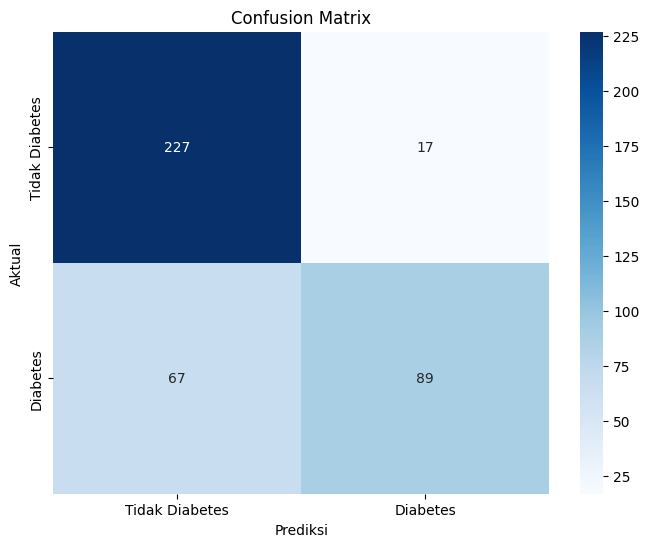

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Diabetes', 'Diabetes'], yticklabels=['Tidak Diabetes', 'Diabetes'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
sample = np.array([[0,135,68,42,250,42.3,0.365,24]])
sample = sc.transform(sample)
prediction = knn.predict(sample)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Percabangan untuk nilai Outcome jika data Outcome berisikan 1 output Terdeteksi Diabetes jika 0 tidak terdeteksi Diabetes.

In [31]:
print(f'Prediksi untuk sampel baru: {prediction[0]}')

# Jika output prediksi adalah 1, berarti terdeteksi diabetes
if prediction[0] == 1:
    print("Terdeteksi diabetes")
else:
    print("Tidak terdeteksi diabetes")

Prediksi untuk sampel baru: 0
Tidak terdeteksi diabetes
